**INTRODUCCIÓN**

Bitcoin vio su nacimiento en el año 2009, y hasta la actualidad se desconoce la identidad real de su creador, a quien se le atribuye el seudónimo de Satoshi Nakamoto pudiendo ser un individuo o un grupo de personas.

Bitcoin es una moneda virtual o un medio de intercambio electrónico que sirve para adquirir productos y servicios como cualquier otra moneda. La diferencia con el resto de las monedas "FIAT" se da en que esta moneda digital es descentralizada, es decir que no existe una autoridad o ente de control que sea responsable de su emisión y registro de sus movimientos.

Por tal motivo, el precio de este activo se regula en el propio mercado de compra-venta, donde los oferentes y compradores emiten órdenes de venta y órdenes de compra estableciendo precios de entrada o salida al activo.

En los últimos años, se ha visto un creciente interés por parte de grandes empresas en aceptar Bitcoin como forma de pago, o bien resguardar parte de su patrimonio en este activo; esto ha generado que se dispare su precio llegando a tocar casi los usd 70.000 en noviembre de 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


**GRÁFICOS Y ANÁLISIS GENERALES SOBRE BITCOIN**

Text(0, 0.5, 'Transacciones')

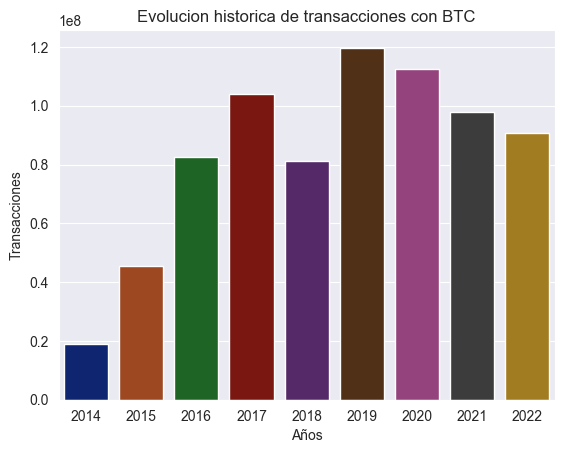

In [17]:
df_tran = df.groupby(['Year'])['transactions'].sum().reset_index()


sns.set_palette("dark")
sns.set_style("darkgrid")

ax = sns.barplot(x="Year", y="transactions", data=df_tran)
ax.set_title('Evolucion historica de transacciones con BTC')
plt.xlabel("Años")
plt.ylabel("Transacciones")

En este gráfico se analiza la evolución histórica de transacciones realizadas en la blockchain de Bitcoin.

A continuación se listan la cantidad de transacciones por año:

In [22]:
df_tran.head(10)

,Year,transactions
0,2014,18951966
1,2015,45618870
2,2016,82571772
3,2017,104010023
4,2018,81340729
5,2019,119726948
6,2020,112497226
7,2021,97743767
8,2022,90826733


Se puede observar que hasta el año 2019 hubo un gran crecimiento en este índice, pero en el año 2020 comenzó un retroceso en la cantidad de transacciones anuales. Este fenómeno puede atribuirse a la inestabilidad en el precio del activo y estar asociado a diferentes motivos, tales como el inicio de la pandemia, la crisis económica global y los conflictos bélicos, como en el caso de Rusia y Ucrania.



**HEATMAP de precios de Bitcoin**

El siguiente HeatMap muestra los precios máximos que ha tenido Bitcoin en cada mes de cada año desde su creación.

C:\Users\Administrador\AppData\Local\Temp\ipykernel_53512\204939205.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")


Text(0.5, 1.0, 'Precio Máximo por mes y año')

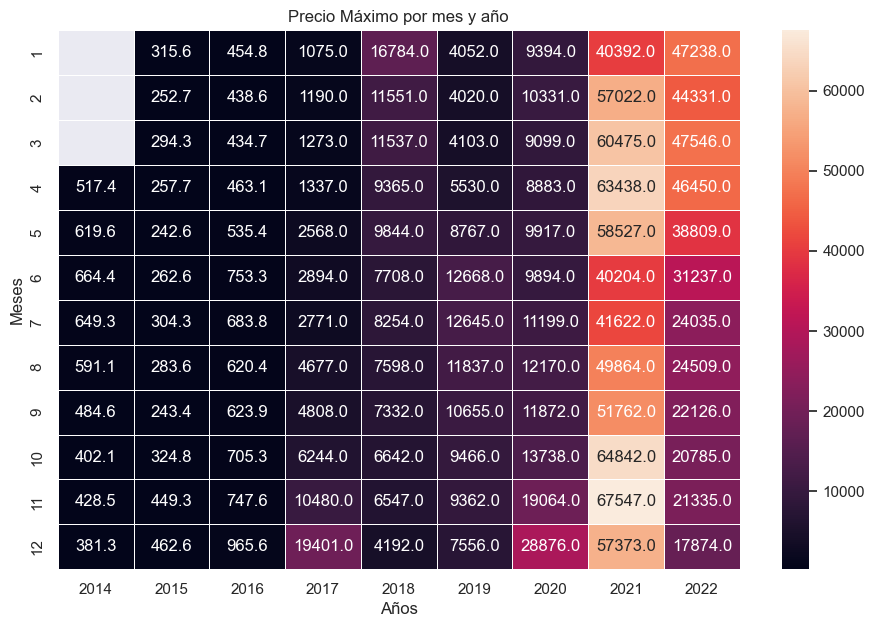

In [21]:
df_price_order = df.groupby(['Year', 'Month'])['priceUSD'].max().reset_index()


df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")

f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(df_price_order1, annot=True, fmt=".1f", linewidths=.5, ax=ax)
plt.xlabel("Años")
plt.ylabel("Meses")
ax.set_title('Precio Máximo por mes y año')

Podemos ver que su precio más alto fue visto en el mes de noviembre de 2021, cuando alcanzó el monto de USD 67.547

**TRANSACCIONES ENVIADAS DE BTC COTIZADAS EN USD**

Text(0, 0.5, 'Transacciones cotizadas en millones de dolares')

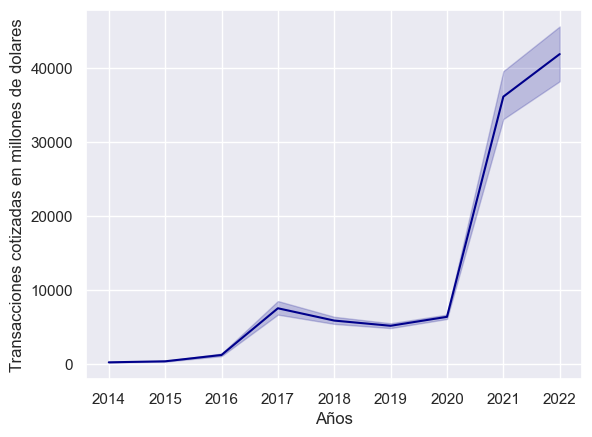

In [37]:
df['sentin_Musd'] = df['sentinusd'] / 1000000

sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="sentin_Musd", data=df, color="darkblue")
plt.xlabel("Años")
plt.ylabel("Transacciones cotizadas en millones de dolares")


Aunque se puede apreciar en el HEATMAP previamente presentado que los precios de BTC han fluctuado y alcanzado sus máximos hace más de un año, se puede observar una tendencia creciente en el volumen de transacciones realizadas año tras año, la cual parece mantenerse.

**Abstracto, motivación y audiencia**

Este proyecto de data science tiene como objetivo analizar la evolución histórica del precio de Bitcoin utilizando un conjunto de datos que incluye información sobre la fecha, el precio en USD, el número de transacciones, la capitalización de mercado, la presencia de la tematica Bitcoin en redes sociales y otros indicadores relevantes.

La hipótesis principal de este proyecto es que el precio de Bitcoin ha sido influenciado por una variedad de factores, incluyendo la adopción por parte de grandes empresas, la regulación gubernamental, la oferta y la demanda del mercado y la actividad en las redes sociales. Se espera que este análisis proporcione una mejor comprensión de cómo estos factores han afectado al precio de Bitcoin a lo largo del tiempo y cómo podrían seguir influyendo en el futuro.

La audiencia principal de este proyecto es cualquier persona interesada en Bitcoin y en las criptomonedas en general, incluyendo inversores, entusiastas y empresas que podrían estar considerando la adopción de esta tecnología. Además, los resultados de este análisis podrían ser útiles para reguladores y responsables políticos que buscan comprender mejor los factores que influyen en el precio de Bitcoin y cómo podrían afectar la economía en general.

**Preguntas/Hipótesis que queremos resolver mediante el análisis de datos**



**HIPÓTESIS 1**

- La volatibilidad en el precio de Bitcoin ha sido sumamente elevada a lo largo de los años, lo que afecta directamente a la capitalización de mercado de este activo.

Para demostrar esto se realizó el siguiente gráfico

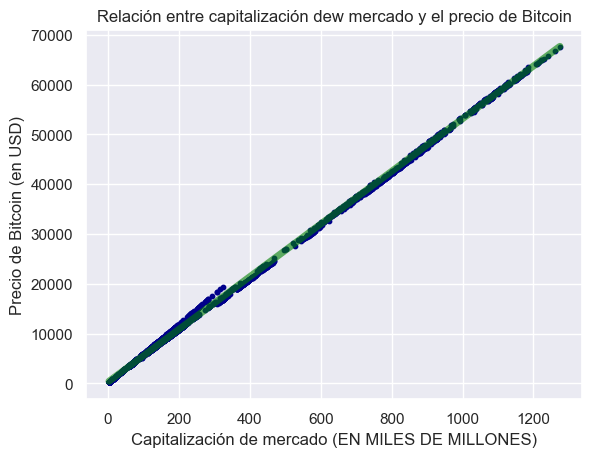

In [38]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
plt.scatter(df['marketcap_en_MM'], df['priceUSD'], s=10, c='darkblue')

m, b = np.polyfit(df['marketcap_en_MM'], df['priceUSD'], 1)
x = np.linspace(min(df['marketcap_en_MM']), max(df['marketcap_en_MM']), 100)
y = m * x + b

plt.plot(x, y, color='green', linewidth=5, alpha=0.60)

plt.title('Relación entre capitalización dew mercado y el precio de Bitcoin')
plt.xlabel('Capitalización de mercado (EN MILES DE MILLONES)')
plt.ylabel('Precio de Bitcoin (en USD)')
plt.grid(True)
plt.show()

**HIPÓTESIS 2**

Como segunda hipótesis a plantear, surge la idea de que el precio de Bitcoin debería influir de forma directa en la cantidad de direcciones activas en determinados períodos de tiempo. Se plantea esto dado que ante precios mayores, aquellos que sean poseedores de wallets que contengan BTC tendrán mayores incentivos para realizar transacciones de compra-venta.
Para analizar este fenómeno se realizan los siguientes cálculos.

In [25]:
correlation = df['priceUSD'].corr(df['activeaddresses'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlation)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.6654127601918235


**CONCLUSIÓN 2**

Al realizar el cálculo del indice de correlación entre las "active adresseses" y el precio de BTC se nos muestra una fuerte correlación positiva entre estos factores, ya que el resultado de 0.665 se considera cercano a 1.

**HIPÓTESIS 3**

Como última hipótesis, se busca demostrar como existe una relación positiva entre la presencia en redes sociales de la tematica Bitcoin y las fluctuaciones en el precio de este activo; la idea de este proyecto será construir un modelo que nos muestre como ambas variales responden de igual manera. 

In [26]:
correlationt = df['priceUSD'].corr(df['tweets'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlationt)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.783682848115497


**CONCLUSIÓN 3**

El índice de correlación entre el precio de Bitcoin y la cantida de tweets es cercano a 1, este resultado puede ser sumamente positivo y útil para poder avanzar en la creación de modelos de predicción más adelante. 

**RESUMEN FINAL**


En conclusión, este proyecto de data science busca analizar la evolución histórica del precio de Bitcoin y cómo diversos factores, incluyendo la actividad en las redes sociales, podrían estar influyendo en este mercado. Se espera que los resultados de este análisis sean útiles para inversores, entusiastas, empresas y reguladores que buscan comprender mejor la dinámica de este mercado en constante cambio y cómo podrían tomar decisiones más informadas en el futuro. La inclusión de la actividad en redes sociales en el análisis podría proporcionar información valiosa sobre cómo los tweets y otras formas de comunicación pueden afectar cambios en el precio.